# Costa Rican Household Poverty Prediction
## Mihai Suteu 05.06.2019


### Content
1. EDA
2. Peprocessing & Feature Engineering
3. Modelling & Eval
4. Conclusion

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = 20, 4

# 1. EDA
Understanding the dataset from multiple perspectives to decide which approaches and methods are best suited.

1. Missing Values
2. Data Types
3. Target Distribution
4. Correlations
5. Row Groups
6. Column Groups
7. Outliers
8. Embeddings

In [2]:
raw = pd.read_csv("data/train.csv")
raw = raw.drop("Id", axis=1)
print(f"rows: {len(raw)}, columns:{len(raw.columns)}")

rows: 9557, columns:142


In [3]:
raw.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000
max,2.353477e+06,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,8.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


## 1.1 Missing Values
- Apparently only 3 features (v2a1, v18q1, rez_esc) have missing values, and also in a significant proportion.
- One could impute them, although I don't suspect it to be too reliable given the little information that is acually present in the columns. 
- I choose to drop them as in this situation the ROI on imputing should be quite low.
- Two other feautues (meaneduc, SQBmeaned) have a low count of missing values and can be safely imputed depending on their distribution (eg mean if unimodal and symmetric)

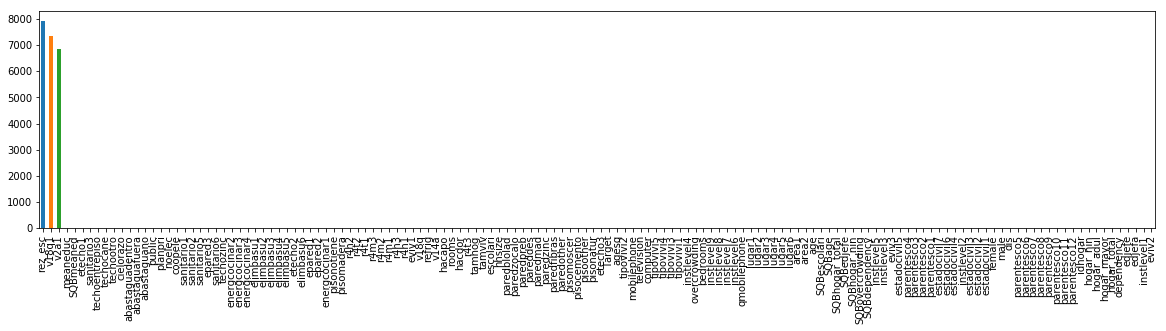

In [18]:
raw.isna().sum(axis=0).sort_values(ascending=False).plot(kind="bar")
plt.show()

In [5]:
raw.isna().sum(axis=0).pipe(lambda df: df[df > 0])

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

## 1.2 Data Types
- We see that the majority of columns are either binary or categorical/ordinal.
- Some binary variables can be merged together if they are ordinal in nature and not mutually exclusive (eg education) to reduce curse of dimensionality.
- Some columns (dependency	edjefe	edjefa) are strings and a mix of multiple variables. Will exclude them due to time contraints but suspect one could extract some useful features out of them.

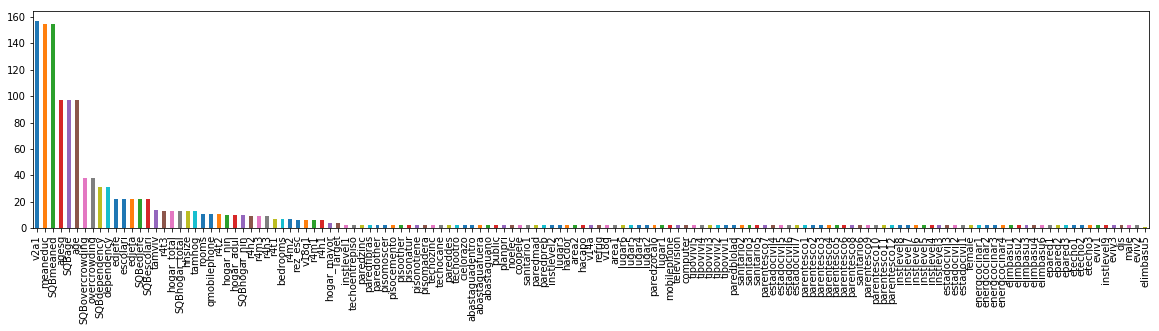

In [19]:
# Number of unique values per column

raw.drop("idhogar", axis=1).nunique().sort_values(ascending=False).plot(kind="bar")
plt.show()

In [7]:
# Columns that are strings
cols_str = raw.dtypes.pipe(lambda df: df[df == "object"]).index
raw[cols_str].head()

,idhogar,dependency,edjefe,edjefa
0,21eb7fcc1,no,10,no
1,0e5d7a658,8,12,no
2,2c7317ea8,8,no,11
3,2b58d945f,yes,11,no
4,2b58d945f,yes,11,no


## 1.3 Target
- We can see a strong imbalance towards class 4.
- We can either fix imbalance by over/under-sampling or just work it out with stratified sampling and appropriate eval metric.
- More analysis can be done to see the conditional target distribution given individual features as a proxy for feature importance.

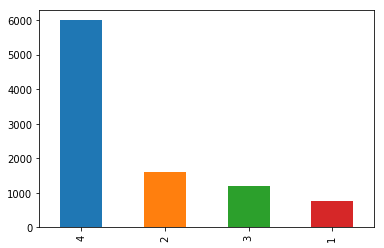

In [8]:
raw["Target"].value_counts().plot(kind="bar")
plt.show()

## 1.4 Correlations
- Too many features to visualise the total heatmap
- Will show only heatmap of highly correlated features
- There are some variables that are heavily correlated with each other - r4t3, tamhog, tamviv, hhsize, hogar_total, SQB_hogar_total
- Some variables are duplicated e.g agesq-SQBage, r4t3-tamhog
- One could either drop variable, PCA the whole/partial thing, or use L1 regularisation

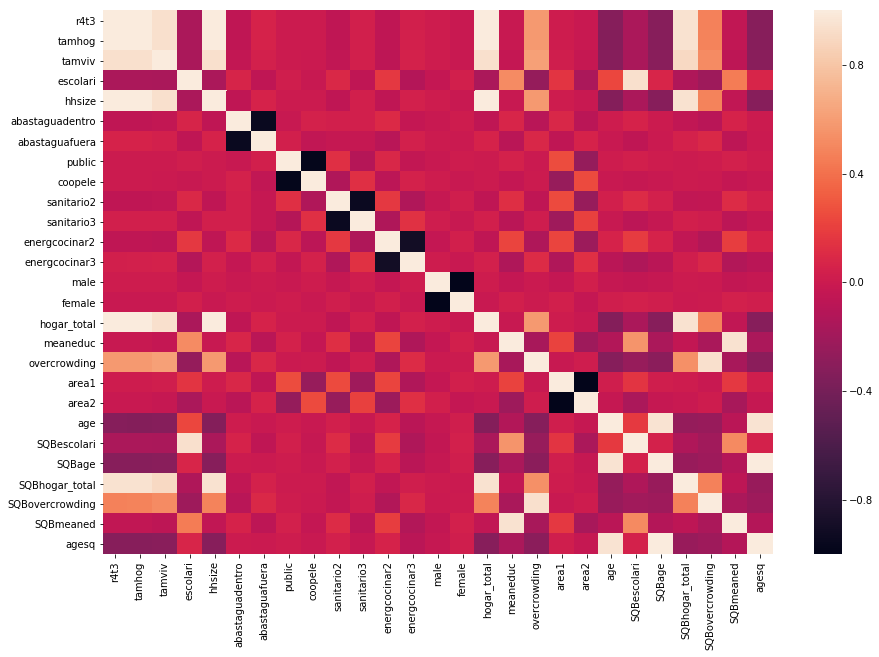

In [9]:
# Select only columns that have atleast one highly correlted variable
cols_corr = (raw.corr().abs() > .90).sum(axis=0).pipe(lambda df: df[df > 1]).index

plt.figure(figsize=(15, 10))
sns.heatmap(raw[cols_corr].corr())
plt.show()

## 1.5 Row Groups
- Some rows have a natural grouping that would allow the construction of some powerful features.
- Each row represents a person, but they can be traced to which family they belong to - which is a strong indicator to the poverty level.
- One could create features that represent the statistics of the familiy they belong to (eg. mean rent).
- I am not going to do this due to time constraints, but should provide some decent alpha.

## 1.6 Columns Groups
- As mentioned earlier, some variables are semantically related to each other and can be grouped together.
- For example education is one-hot encoded but doesnt have to be. The education level is ordinal in nature and can be represented by a single feature.
- The benefit of this is to reduce the total dimensionality we operate in, which should have beneficial effects on score.
- Am not going to do this either due to time contraints.

## 1.7 Outliers
- Only looking at univariate outliers.
- Can see some values are clearly mistakes that should be filtered out (rent prices).
- SQB variables are squared so high values are expected - more investigation is necessary in those cases.
- Before making any decisions one should read up on what the features mean exactly and then decide whether to exclude those rows or process the variable (clipping, log-ing).

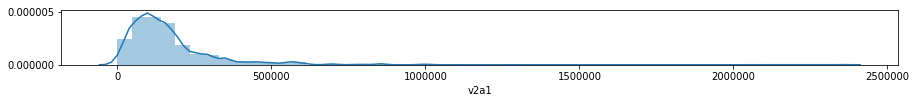

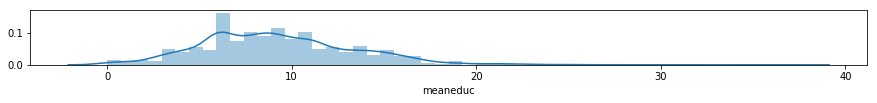

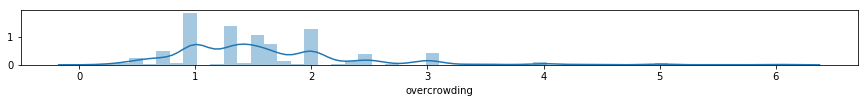

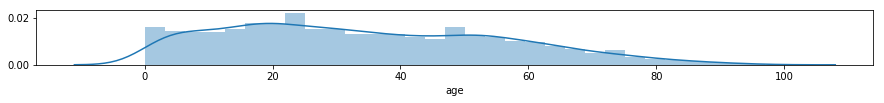

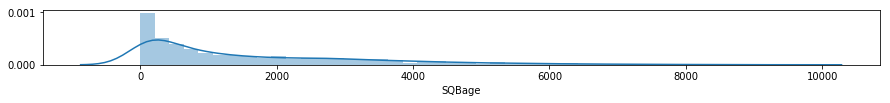

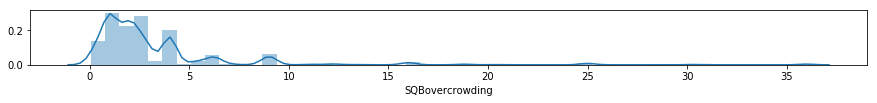

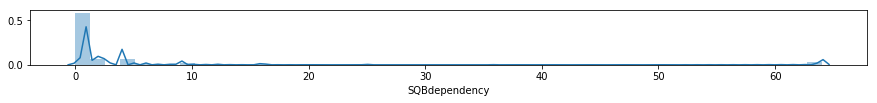

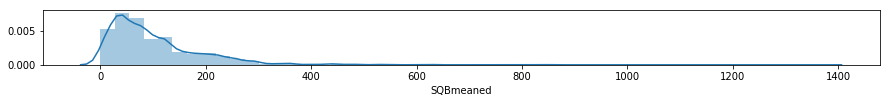

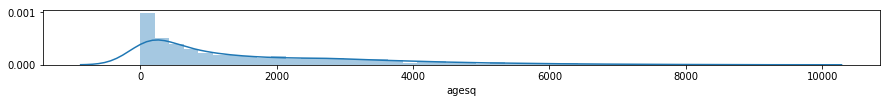

In [10]:
cols = raw.drop(cols_str, axis=1).nunique().pipe(lambda df: df[df > 30]).index

for col in cols:
    plt.figure(figsize=(15, 1))
    sns.distplot(raw[col].dropna())
    plt.show()

## 1.8 Embeddings
- Visualising a 2D embedding of the data to get a sense of its complexity
- Seems like there is not a clear separation between classes, would expect low classification performance

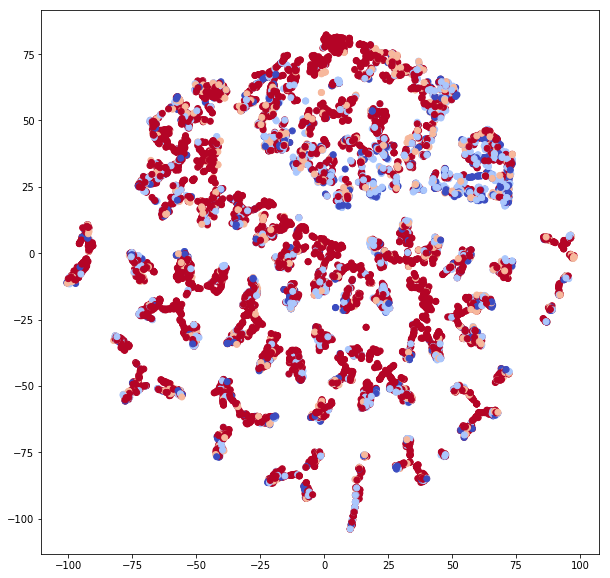

In [11]:
from sklearn.manifold import TSNE

embd = raw.drop(["v2a1", "v18q1", "rez_esc", "idhogar", "dependency", "edjefe", "edjefa"], axis=1)  # missing values, strings
embd = embd.dropna()
embd_X = embd.drop("Target", axis=1)
embd_y = embd["Target"]
embd_X = TSNE().fit_transform(embd_X)

plt.figure(figsize=(10, 10))
plt.scatter(embd_X[:,0], embd_X[:,1], cmap="coolwarm", c=embd_y)
plt.show()

# 2. Processing & Feature Engineering
- There is a lot that can be done, but I will stick to the bare minimum otherwise it will take forever.
- Will not do any row or column grouping or any creation of new/derivative features.
- I am aware that I am dropping an excessive amount of features and will probably incur a small performance hit.

In [12]:
data = raw
data = data.drop(["v2a1", "v18q1", "rez_esc"], axis=1)  # contain missing values 
data = data.drop(["idhogar", "dependency", "edjefe", "edjefa"], axis=1) # strings
data = data.drop(["r4t3", "hhsize", "hogar_total", "SQBhogar_total", "agesq", "meaneduc"], axis=1) # correlated/duplicated
data = data.dropna()
data.shape

(9552, 129)

# 3. Modelling
1. Baseline
2. XGBoost

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

## 3.1 LinReg
- Basline model without any tweaking to get a sense on where one stands
- Using L1 reg to induce sparsity in the parameters (becuase of the superfluous one hot encodings)
- GridsearchCV defaults to stratified sampling.
- Baseline shows signs of overfitting as well as undefitting - which indicates a failure to learn. Not clear whether of the lack of information from the data (feature engineering needed) or because the model is too simple.

In [14]:
pipeline = make_pipeline(StandardScaler(), LogisticRegression())
search = GridSearchCV(estimator=pipeline, param_grid={"logisticregression__penalty": ["l1"]}, cv=5, n_jobs=-1, 
                      scoring="f1_macro", return_train_score=True)
search.fit(data.drop("Target", axis=1), data["Target"])

print(f"mean train: {search.cv_results_['mean_train_score'][0]}")
print(f"mean test: {search.cv_results_['mean_test_score'][0]}")

/home/xapharius/work/libs/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/xapharius/work/libs/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/xapharius/work/libs/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/xapharius/work/libs/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


mean train: 0.48226645359382336
mean test: 0.2648814088781931


## 3.2 XGBoost
- Gridsearching over max_depth and l1 weight to see effects on overfitting.
- Still strong overfitting (as well as underfitting).
- No significant gain from linear regression (+3%) - more feature eingineering is necessary to create features that have better discrinimatory power.
- Worthwhile sticking to linear regression for faster iterations on data processing strategies.

In [15]:
pipeline = make_pipeline(StandardScaler(), XGBClassifier())
search = GridSearchCV(estimator=pipeline, param_grid={"xgbclassifier__n_estimators": [100, 200, 300], 
                                                      "xgbclassifier__max_depth": [3, 4, 5],
                                                      "xgbclassifier__reg_alpha": [1e-2, 0, 10]}, 
                      cv=5, n_jobs=-1, scoring="f1_macro", return_train_score=True)
search.fit(data.drop("Target", axis=1), data["Target"])

print(f"mean train: {search.cv_results_['mean_train_score']}")
print(f"mean test: {search.cv_results_['mean_test_score']}")

/home/xapharius/work/libs/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/xapharius/work/libs/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


mean train: [0.59209976 0.58993982 0.56136781 0.68932549 0.68559886 0.64758762
 0.74858441 0.74822086 0.69046267 0.70999448 0.70897393 0.6639614
 0.81869131 0.81842008 0.76015503 0.88022588 0.87765467 0.7772672
 0.82030299 0.81442665 0.75692666 0.91320388 0.91358599 0.82578763
 0.95816878 0.95611481 0.83368288]
mean test: [0.26363312 0.26803589 0.26852796 0.27338177 0.27639442 0.28372599
 0.28203878 0.27793655 0.28323354 0.25967867 0.26649533 0.28879855
 0.26673181 0.27108323 0.28535706 0.27630086 0.26765773 0.28774302
 0.27140991 0.27190317 0.29105367 0.26630909 0.27420099 0.28918185
 0.27871959 0.27632368 0.28932418]


# 4. Conclusion

- This notebook shows a broad overview of the data science process.
- Considerations as well as potential improvements have been pointed out along the way.
- The simplest approach with minimal feature preprocessing and no engineering has been selected with mediocre results.
- A more rigurous analysis of the errors of the model is needed in order to see where its errors lie - curse of dimensionality might prevent it from learning the actual patterns, individuals are too noisy and require features derived from famility data or some important features have been dropped.